In [10]:
import numpy as np 
from sklearn.model_selection import train_test_split
import keras 
import tensorflow as tf
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [11]:
train_data = pd.read_csv('./MNIST Dataset Processed/output.csv')
# test_data = pd.read_csv('test_data.csv')

label_encoder = LabelEncoder()
train_ans = train_data['Label']
train_ans = label_encoder.fit_transform(train_ans)

train_data = train_data.drop(columns=['Image_No', 'Label'])

# test_ans = test_data['Label']
# test_ans = label_encoder.fit_transform(test_ans)
# test_data = test_data.drop(columns=['Image_No', 'Label'])

In [12]:
classes = os.listdir('./MNIST Dataset Processed')
num_classes = len(classes) + 1
print(classes)

scaler = MinMaxScaler()
train_data = np.array(train_data).astype('float32')
train_data = np.where(train_data == 0, 10e-6, train_data)
train_data = scaler.fit_transform(train_data)
# test_data = np.array(test_data).astype('float32')/500.0

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'LDA.png', 'M', 'N', 'Nothing', 'O', 'output.csv', 'P', 'PCA.png', 'Q', 'R', 'S', 'Space', 'T', 'TSNE.png', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [13]:
X_train, X_temp, y_train, y_temp = train_test_split(train_data, train_ans, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42) 

# print(X_train)

y_train = keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes=num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes=num_classes)
# test_ans = keras.utils.to_categorical(test_ans, num_classes=num_classes)

In [14]:
# Perceptron
model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_classes * 16, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes * 8, activation='relu'),
    keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes * 4, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes * 2, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_classes * 16, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes * 8, activation='relu'),
    keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes * 4, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes * 2, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# add batch normalizaton

model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_classes * 16, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes * 8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes * 4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes * 2, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

print(X_train.shape)

(231938, 126)


In [15]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics="accuracy")

print(model.summary())

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 528)               67056     
                                                                 
 batch_normalization_4 (Batc  (None, 528)              2112      
 hNormalization)                                                 
                                                                 
 dropout_15 (Dropout)        (None, 528)               0         
                                                                 
 dense_26 (Dense)            (None, 264)               139656    
                                                                 
 batch_normalization_5 (Batc  (None, 264)              1056      
 hNormalization)                                                 
                                                                 
 dropout_16 (Dropout)        (None, 264)              

In [16]:
loss, accuracy = model.evaluate(X_test, y_test)
print(loss)
print(accuracy)

1554/1554 [==============================] - 2s 1ms/step - loss: 0.0075 - accuracy: 0.9315
0.007482150103896856
0.9314702153205872


In [17]:
# loss, accuracy = model.evaluate(test_data, test_ans)
# print(loss)
# print(accuracy)

In [18]:
predicted_labels = model.predict(X_test)
print(np.argmax(predicted_labels, axis=1))


1554/1554 [==============================] - 2s 1ms/step
[11  9  5 ... 13 26  5]


In [19]:
# classification_report(y_, predicted_labels)
test_list = np.argmax(y_test, axis=1)
predict_list = np.argmax(predicted_labels, axis=1)


print(classification_report(test_list, predict_list))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1767
           1       1.00      1.00      1.00      1801
           2       1.00      1.00      1.00      1862
           3       1.00      0.99      1.00      1807
           4       1.00      0.47      0.63      1810
           5       1.00      1.00      1.00      1795
           6       1.00      1.00      1.00      1789
           7       1.00      1.00      1.00      1725
           8       1.00      0.99      1.00      1810
           9       1.00      1.00      1.00      1840
          10       0.95      1.00      0.97      1753
          11       1.00      1.00      1.00      1844
          12       0.43      1.00      0.61      1683
          13       1.00      0.86      0.93      1814
          14       0.00      0.00      0.00      1811
          15       1.00      0.98      0.99      1785
          16       1.00      0.99      1.00      1811
          17       1.00    

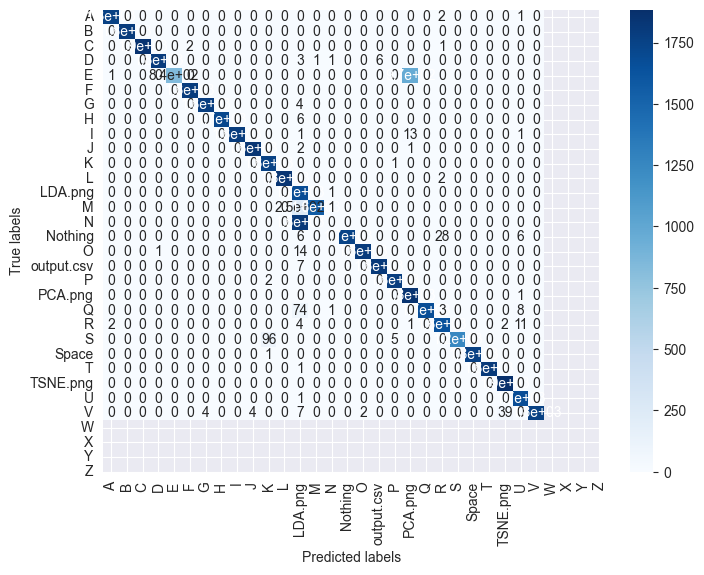

In [20]:
cm = confusion_matrix(test_list, predict_list)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

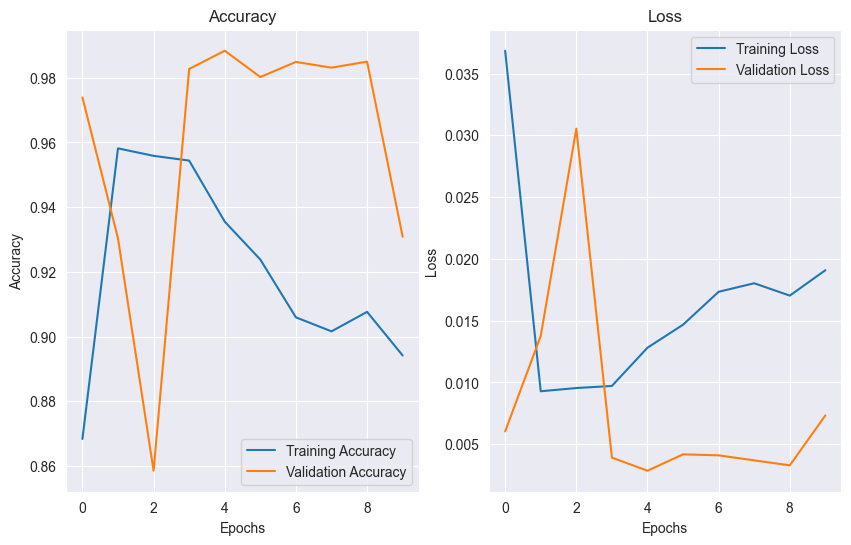

In [21]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.savefig("Accuracy and loss graph.png")
plt.show()

In [22]:
model.save('model_handsign.h5')

In [23]:
from keras.models import model_from_json

# Assuming "model" is your Keras model
model_json = model.to_json()

# Save the model architecture to a JSON file
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# Save the model weights to an HDF5 file (assuming you want to save weights separately)
model.save_weights("model_weights.h5")